In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,49.500,29.011492,0.0,24.750,49.5,74.25,99.0
cgpa,100.0,5.991,1.143634,3.3,5.075,6.0,6.90,8.5
iq,100.0,123.580,39.944198,37.0,101.500,127.5,149.00,233.0
placement,100.0,0.500,0.502519,0.0,0.000,0.5,1.00,1.0


##### The unnamed feature is unnecessary, so we need to drop this column.

In [6]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### Let's conduct exploratory data analysis (EDA) on the dataset.

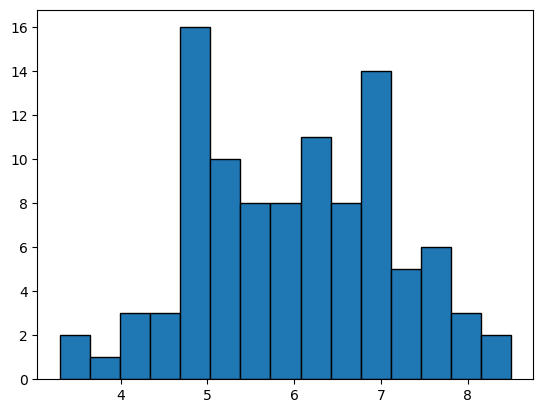

In [26]:
plt.hist(x= "cgpa",bins=15,edgecolor= "black",data=df)
plt.show()

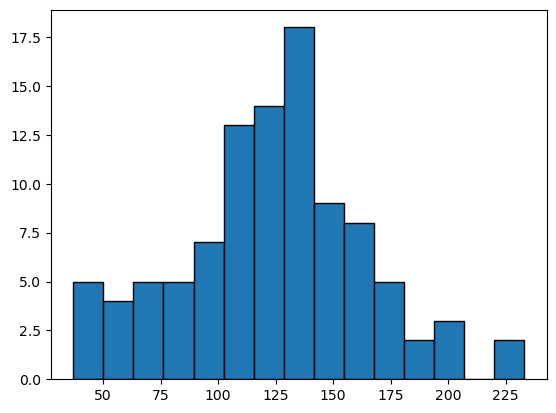

In [25]:
plt.hist(x= "iq",bins=15,edgecolor= "black",data=df)
plt.show()

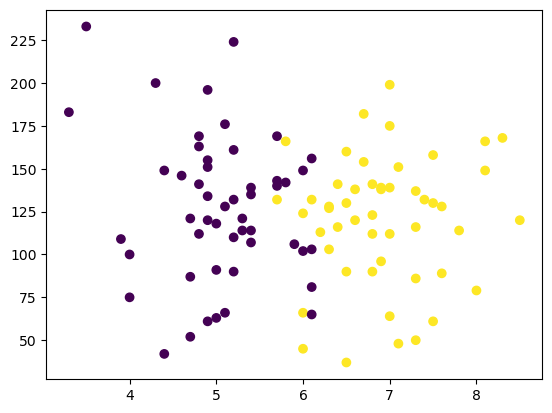

In [15]:
plt.scatter(x="cgpa", y="iq",data=df,c="placement")

#### Extract input and output feature

In [27]:
x = df.iloc[:,:-1]

In [30]:
y = df["placement"]

#### Split input and output data into training and testing data

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

#### Scaling the value

In [43]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

In [44]:
x_train = s_scaler.fit_transform(x_train)

In [45]:
x_train

array([[ 0.55235263,  1.58437436],
       [-1.04821465,  0.78810764],
       [-1.04821465,  0.89085173],
       [ 1.08587505, -0.88148389],
       [-0.33685141,  0.30007319],
       [ 0.37451182, -0.77873979],
       [-0.69253303,  0.01752693],
       [ 0.73019344,  0.47987536],
       [ 1.08587505, -1.80618073],
       [ 0.19667101,  0.1973291 ],
       [-1.93741869, -0.29070535],
       [-1.04821465, -0.00815909],
       [-1.49281667,  0.73673559],
       [-0.60361263,  0.47987536],
       [ 1.70831788, -1.06128605],
       [-1.84849829, -1.16403014],
       [-0.15901061, -0.36776342],
       [ 0.19667101,  0.17164307],
       [ 0.37451182, -2.14009904],
       [-1.13713505,  1.09633992],
       [-0.95929424, -1.47226243],
       [ 0.81911384,  1.4045722 ],
       [ 0.46343222, -0.00815909],
       [ 0.0188302 ,  0.30007319],
       [-1.58173707,  2.04672279],
       [ 0.19667101, -0.44482149],
       [ 0.0188302 , -1.009914  ],
       [-1.84849829, -0.52187956],
       [ 0.73019344,

In [47]:
x_test = s_scaler.fit_transform(x_test)

### Model Creation

In [50]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [51]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred = lr_model.predict(x_test)

In [54]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score,r2_score

In [59]:
print("accuracy score : ", accuracy_score(y_test,y_pred))
print("r2_score : ",r2_score(y_test,y_pred))

accuracy score :  0.9333333333333333
r2_score :  0.7000000000000001


In [61]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

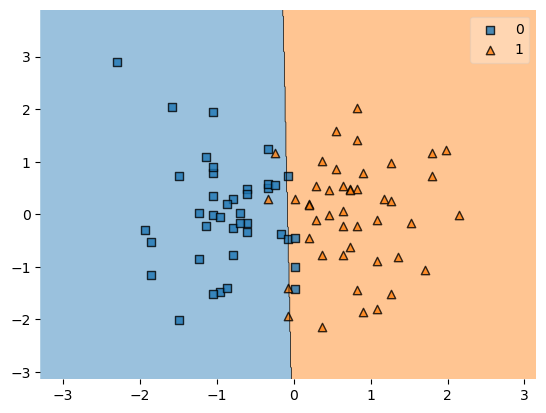

In [63]:
plot_decision_regions(x_train,y_train.values,clf=lr_model)